In [36]:
import pandas as pd
import xarray as xr
import numpy as np
import time as tm

## Downloading

In [5]:
pip install requests beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [22]:
import os
import requests
from bs4 import BeautifulSoup

base_url = "https://www.ncei.noaa.gov/data/global-precipitation-climatology-project-gpcp-daily/access/"

# Years range
years = range(2004, 2019)  # From 1997 to 2018

main_folder = 'gpcp1.3_nc_files'
os.makedirs(main_folder, exist_ok=True)

for year in years:
    year_url = f"{base_url}{year}/"
    print(f"Accessing {year_url}...")

    # Create a subfolder for each year
    year_folder = os.path.join(main_folder, str(year))
    os.makedirs(year_folder, exist_ok=True)

    # Fetch the webpage for the given year
    response = requests.get(year_url)
    if response.status_code != 200:
        print(f"Failed to access {year_url}")
        continue

    soup = BeautifulSoup(response.content, 'html.parser')

    # Find all the links to .nc files
    for link in soup.find_all('a'):
        href = link.get('href')
        if href.endswith('.nc'):  # Only get .nc files
            file_url = year_url + href
            print(f"Downloading {href} from {year}...")
            file_response = requests.get(file_url)
            with open(os.path.join(year_folder, href), 'wb') as f:
                f.write(file_response.content)

print("All files downloaded.")

Accessing https://www.ncei.noaa.gov/data/global-precipitation-climatology-project-gpcp-daily/access/2004/...
Accessing https://www.ncei.noaa.gov/data/global-precipitation-climatology-project-gpcp-daily/access/2005/...
Accessing https://www.ncei.noaa.gov/data/global-precipitation-climatology-project-gpcp-daily/access/2006/...
Accessing https://www.ncei.noaa.gov/data/global-precipitation-climatology-project-gpcp-daily/access/2007/...
Accessing https://www.ncei.noaa.gov/data/global-precipitation-climatology-project-gpcp-daily/access/2008/...
Accessing https://www.ncei.noaa.gov/data/global-precipitation-climatology-project-gpcp-daily/access/2009/...
Accessing https://www.ncei.noaa.gov/data/global-precipitation-climatology-project-gpcp-daily/access/2010/...
Accessing https://www.ncei.noaa.gov/data/global-precipitation-climatology-project-gpcp-daily/access/2011/...
Accessing https://www.ncei.noaa.gov/data/global-precipitation-climatology-project-gpcp-daily/access/2012/...
Accessing https://w

In [17]:
ds.lon.values

array([-5.0000e-02,  5.0000e-02,  1.5000e-01, ...,  3.5985e+02,
        3.5995e+02,  3.6005e+02])

## Combining

In [99]:
import xarray as xr
import os

nc_dir = 'gpcp1.3_nc_files'

# Initialize an empty list to collect all the .nc files
nc_files = []

for year in range(1997, 2019):  # Years from 1997 to 2018
    year_folder = os.path.join(nc_dir, str(year))
    
    # List all the .nc files in the current year's folder
    files = [os.path.join(year_folder, f) for f in os.listdir(year_folder) if f.endswith('.nc')]
    
    # Print the current year being processed
    print(f"Processing files from {year}...")
    
    # Add the current year's files to the overall list
    nc_files.extend(files)

# Open multiple NetCDF files and combine them into one dataset
ds_combined = xr.open_mfdataset(nc_files, combine='by_coords', chunks=None)

Processing files from 1997...
Processing files from 1998...
Processing files from 1999...
Processing files from 2000...
Processing files from 2001...
Processing files from 2002...
Processing files from 2003...
Processing files from 2004...
Processing files from 2005...
Processing files from 2006...
Processing files from 2007...
Processing files from 2008...
Processing files from 2009...
Processing files from 2010...
Processing files from 2011...
Processing files from 2012...
Processing files from 2013...
Processing files from 2014...
Processing files from 2015...
Processing files from 2016...
Processing files from 2017...
Processing files from 2018...


In [249]:
ds_combined.to_netcdf('GPCP1DDv1.3.nc')

## Reading

In [3]:
ds_combined = xr.open_dataset('GPCP1DDv1.3.nc')

In [4]:
ds_combined

<xarray.Dataset>
Dimensions:      (latitude: 180, longitude: 360, time: 8035, nv: 2)
Coordinates:
  * latitude     (latitude) float32 -90.0 -89.0 -88.0 -87.0 ... 87.0 88.0 89.0
  * longitude    (longitude) float32 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * time         (time) datetime64[ns] 1997-01-01 1997-01-02 ... 2018-12-31
Dimensions without coordinates: nv
Data variables:
    lat_bounds   (time, latitude, nv) float32 ...
    lon_bounds   (time, longitude, nv) float32 ...
    time_bounds  (time, nv) datetime64[ns] ...
    precip       (time, latitude, longitude) float32 ...
Attributes: (12/45)
    Conventions:                CF-1.6, ACDD 1.3
    title:                      Global Precipitation Climatatology Project (G...
    source:                     /data1/GPCP_CDR/GPCP_Output/1DD//bin/199701/s...
    references:                 Huffman et al. 1997, http://dx.doi.org/10.117...
    history:                    1) 2017-05-30T16:53:52Z, Dr. Jian-Jian Wang, ...
    Metadata_Conventions:       CF-1.6, Unidata Dataset Discovery v1.0, NOAA ...
    ...                         ...
    metadata_link:              gov.noaa.ncdc:XXXXX
    product_version:            v01r03
    platform:                   GOES (Geostationary Operational Environmental...
    sensor:                     Imager, TOVS > TIROS Operational Vertical Sou...
    spatial_resolution:         1 degree
    comment:                    Processing computer: eagle2.umd.edu

#### Subsetting

In [5]:
# Subset the data for latitudes between 20°N and 20°S
ds_subset = ds_combined.sel(latitude=slice(-20, 20))

In [6]:
ds_subset = xr.open_dataset('combined_subset_20N_20S.nc')

In [7]:
ds_subset

<xarray.Dataset>
Dimensions:      (latitude: 41, longitude: 360, time: 8035, nv: 2)
Coordinates:
  * latitude     (latitude) float32 -20.0 -19.0 -18.0 -17.0 ... 18.0 19.0 20.0
  * longitude    (longitude) float32 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * time         (time) datetime64[ns] 1997-01-01 1997-01-02 ... 2018-12-31
Dimensions without coordinates: nv
Data variables:
    lat_bounds   (time, latitude, nv) float32 ...
    lon_bounds   (time, longitude, nv) float32 ...
    time_bounds  (time, nv) datetime64[ns] ...
    precip       (time, latitude, longitude) float32 ...
Attributes: (12/45)
    Conventions:                CF-1.6, ACDD 1.3
    title:                      Global Precipitation Climatatology Project (G...
    source:                     /data1/GPCP_CDR/GPCP_Output/1DD//bin/199701/s...
    references:                 Huffman et al. 1997, http://dx.doi.org/10.117...
    history:                    1) 2017-05-30T16:53:52Z, Dr. Jian-Jian Wang, ...
    Metadata_Conventions:       CF-1.6, Unidata Dataset Discovery v1.0, NOAA ...
    ...                         ...
    metadata_link:              gov.noaa.ncdc:XXXXX
    product_version:            v01r03
    platform:                   GOES (Geostationary Operational Environmental...
    sensor:                     Imager, TOVS > TIROS Operational Vertical Sou...
    spatial_resolution:         1 degree
    comment:                    Processing computer: eagle2.umd.edu

In [266]:
print(ds_subset)

<xarray.Dataset>
Dimensions:      (latitude: 41, longitude: 360, time: 8035, nv: 2)
Coordinates:
  * latitude     (latitude) float32 -20.0 -19.0 -18.0 -17.0 ... 18.0 19.0 20.0
  * longitude    (longitude) float32 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * time         (time) datetime64[ns] 1997-01-01 1997-01-02 ... 2018-12-31
Dimensions without coordinates: nv
Data variables:
    lat_bounds   (time, latitude, nv) float32 ...
    lon_bounds   (time, longitude, nv) float32 ...
    time_bounds  (time, nv) datetime64[ns] ...
    precip       (time, latitude, longitude) float32 ...
Attributes: (12/45)
    Conventions:                CF-1.6, ACDD 1.3
    title:                      Global Precipitation Climatatology Project (G...
    source:                     /data1/GPCP_CDR/GPCP_Output/1DD//bin/199701/s...
    references:                 Huffman et al. 1997, http://dx.doi.org/10.117...
    history:                    1) 2017-05-30T16:53:52Z, Dr. Jian-Jian Wang, ...
    Metadata_Conve

## Mask

In [15]:
mask_ds = xr.open_dataset("IMERG_mask.nc")

In [16]:
mask_ds

<xarray.Dataset>
Dimensions:      (lon: 3602, lat: 1800)
Coordinates:
  * lon          (lon) float64 -0.05 0.05 0.15 0.25 ... 359.8 359.9 360.0 360.1
  * lat          (lat) float64 -89.95 -89.85 -89.75 -89.65 ... 89.75 89.85 89.95
Data variables:
    landseamask  (lat, lon) float32 ...

## Incorporating mask

In [33]:
import xarray as xr

# Coarsen the mask to 1x1 degrees
mask_coarsened = mask_ds['landseamask'].coarsen(
    lon=10,  
    lat=10,  
    boundary='pad'
).min() to ensure ocean areas are retained

# Regrid the coarsened mask to match the latitude and longitude of ds_subset
regrid_mask = mask_coarsened.interp(
    lat=ds_subset['latitude'],
    lon=ds_subset['longitude'],
    method='nearest'  
)

# Create a new dataset for the regridded mask
regrid_mask_ds = xr.Dataset({
    'binary_landseamask': regrid_mask
}, coords={
    'latitude': ds_subset['latitude'],
    'longitude': ds_subset['longitude']
})

# Combine ds_subset with the regridded mask dataset
grid_masked = ds_subset.merge(regrid_mask_ds)

<xarray.Dataset>
Dimensions:             (latitude: 41, longitude: 360, time: 8035, nv: 2)
Coordinates:
  * latitude            (latitude) float32 -20.0 -19.0 -18.0 ... 18.0 19.0 20.0
  * longitude           (longitude) float32 0.0 1.0 2.0 ... 357.0 358.0 359.0
  * time                (time) datetime64[ns] 1997-01-01 ... 2018-12-31
    lat                 (latitude) float32 -20.0 -19.0 -18.0 ... 18.0 19.0 20.0
    lon                 (longitude) float32 0.0 1.0 2.0 ... 357.0 358.0 359.0
Dimensions without coordinates: nv
Data variables:
    lat_bounds          (time, latitude, nv) float32 ...
    lon_bounds          (time, longitude, nv) float32 ...
    time_bounds         (time, nv) datetime64[ns] ...
    precip              (time, latitude, longitude) float32 ...
    binary_landseamask  (latitude, longitude) float32 nan 100.0 ... 0.0 0.0
Attributes: (12/45)
    Conventions:                CF-1.6, ACDD 1.3
    title:                      Global Precipitation Climatatology Project (G..

# Processing Data

In [276]:
grid_masked

<xarray.Dataset>
Dimensions:             (time: 8030, latitude: 41, nv: 2, longitude: 360)
Coordinates:
  * latitude            (latitude) float32 -20.0 -19.0 -18.0 ... 18.0 19.0 20.0
  * longitude           (longitude) float32 0.0 1.0 2.0 ... 357.0 358.0 359.0
  * time                (time) datetime64[ns] 1997-01-01 ... 2018-12-31
    lat                 (latitude) float32 -20.0 -19.0 -18.0 ... 18.0 19.0 20.0
    lon                 (longitude) float32 0.0 1.0 2.0 ... 357.0 358.0 359.0
Dimensions without coordinates: nv
Data variables:
    lat_bounds          (time, latitude, nv) float32 -20.0 -19.0 ... 20.0 21.0
    lon_bounds          (time, longitude, nv) float32 0.0 1.0 ... 359.0 360.0
    time_bounds         (time, nv) datetime64[ns] 1997-01-01 ... 2019-01-01
    precip              (time, latitude, longitude) float32 0.0 0.0 ... 0.0 0.0
    binary_landseamask  (latitude, longitude, time) float64 nan nan ... 0.0 0.0
Attributes: (12/45)
    Conventions:                CF-1.6, ACDD 1.3
    title:                      Global Precipitation Climatatology Project (G...
    source:                     /data1/GPCP_CDR/GPCP_Output/1DD//bin/199701/s...
    references:                 Huffman et al. 1997, http://dx.doi.org/10.117...
    history:                    1) 2017-05-30T16:53:52Z, Dr. Jian-Jian Wang, ...
    Metadata_Conventions:       CF-1.6, Unidata Dataset Discovery v1.0, NOAA ...
    ...                         ...
    metadata_link:              gov.noaa.ncdc:XXXXX
    product_version:            v01r03
    platform:                   GOES (Geostationary Operational Environmental...
    sensor:                     Imager, TOVS > TIROS Operational Vertical Sou...
    spatial_resolution:         1 degree
    comment:                    Processing computer: eagle2.umd.edu

In [225]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Step 0: Get the ocean mask (where binary_landseamask == 1)
ocean_mask = grid_masked['binary_landseamask'] == 1

# Step 1: Remove February 29th from leap years
time = grid_masked['time']
non_leap_mask = ~((time.dt.month == 2) & (time.dt.day == 29))
grid_masked = grid_masked.where(non_leap_mask, drop=True)

# Step 2: Define precipitation bins
precip_bins = np.arange(1, 51, 1)  # Bins from 1 to 50 mm/day in 1 mm intervals

# Step 3: Compute histograms over time (e.g., daily), but only for ocean points
hist_data = []
for t in range(len(grid_masked['time'])):
    # Get daily precipitation
    daily_precip = grid_masked['precip'].isel(time=t)
    
    # Apply the ocean mask to keep only ocean points
    ocean_precip = daily_precip.where(ocean_mask, drop=True).values.flatten()
    
    # Filter for precipitation between 1 and 50 mm/day
    ocean_precip = ocean_precip[(ocean_precip >= 1) & (ocean_precip <= 50)]
    
    # Calculate histogram
    hist, _ = np.histogram(ocean_precip, bins=precip_bins)
    hist_data.append(hist)
    if ((t+1)%100 == 0):
        print(t+1)

# Convert hist_data to a NumPy array for easier plotting
hist_data = np.array(hist_data)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000


### Weighted

In [34]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Get the ocean mask 
ocean_mask = grid_masked['binary_landseamask'] == 100

# Remove February 29th from leap years
time = grid_masked['time']
non_leap_mask = ~((time.dt.month == 2) & (time.dt.day == 29))
grid_masked = grid_masked.where(non_leap_mask, drop=True)

# Define precipitation bins
precip_bins = np.arange(0, 58, 1)  

# Calculate latitudinal area weights
latitudes = grid_masked['latitude']
area_weights = np.cos(np.deg2rad(latitudes))  # Apply cosine weighting

# Compute histograms over time (e.g., daily), but only for ocean points
hist_data = []
for t in range(len(grid_masked['time'])):
    
    daily_precip = grid_masked['precip'].isel(time=t)
    ocean_precip = daily_precip.where(ocean_mask, drop=True)
    weighted_ocean_precip = (ocean_precip * area_weights).values.flatten()
    
    # Calculate histogram
    hist, _ = np.histogram(weighted_ocean_precip, bins=precip_bins)
    hist_data.append(hist)

hist_data = np.array(hist_data)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000


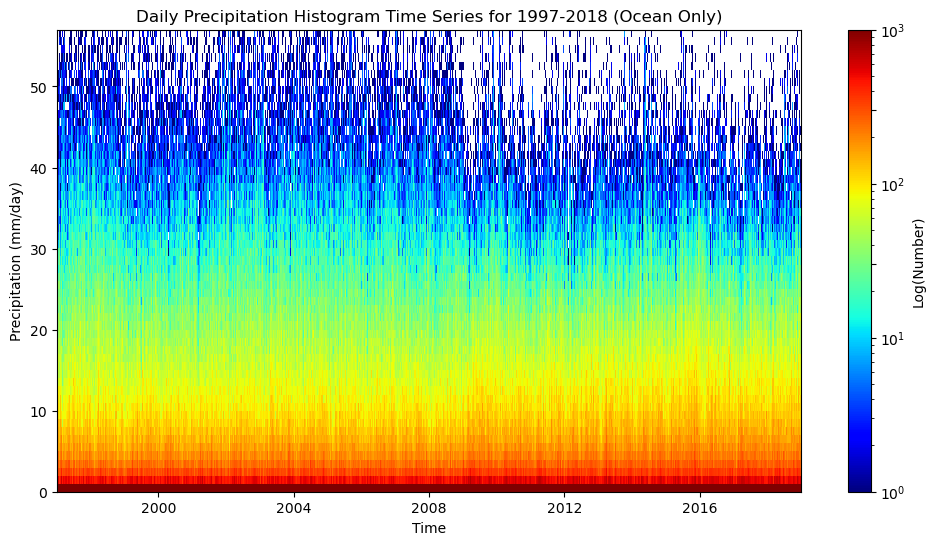

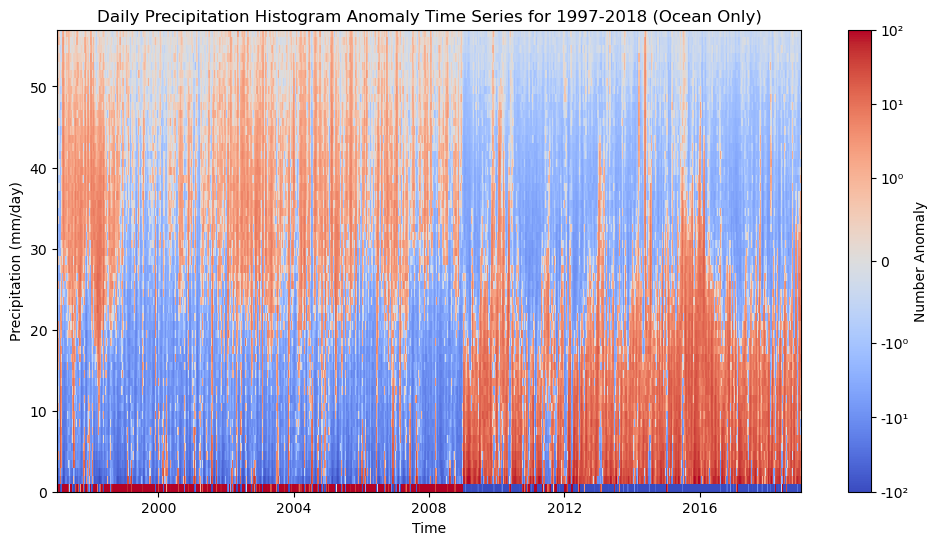

In [35]:
from scipy.signal import savgol_filter

cmap_base = 'jet'
cmap = plt.get_cmap(cmap_base)

## Plot 1: Histogram Time Series

plt.figure(figsize=(12, 6))

# Normalize and create log scale for better color representation
norm = mcolors.LogNorm(vmin=1, vmax=1000)

plt.imshow(
    hist_data.T,  
    aspect='auto',
    origin='lower',
    cmap=cmap,  
    extent=[grid_masked['time'][0].values, grid_masked['time'][-1].values, precip_bins[0], precip_bins[-1]],
    norm=norm,
    interpolation='nearest'  
)


plt.colorbar(label='Log(Number)', ticks=[1, 10, 30, 100, 300, 1000])  # Set color bar ticks to log scale
plt.xlabel('Time')
plt.ylabel('Precipitation (mm/day)')
plt.title('Daily Precipitation Histogram Time Series for 1997-2018 (Ocean Only)')

plt.show()


## Plot 2

# Compute climatology for 365 days
days_in_year = 365
climatology = np.zeros((days_in_year, len(precip_bins) - 1))
day_of_year = time.dt.dayofyear.where(non_leap_mask, drop=True) % days_in_year

for day in range(days_in_year):
    day_histograms = hist_data[day_of_year == day]
    climatology[day] = np.mean(day_histograms, axis=0)

# Calculate anomalies
hist_anomalies = []
for i in range(hist_data.shape[0]):
    day_of_year = i % days_in_year
    daily_anomaly = hist_data[i] - climatology[day_of_year]
    hist_anomalies.append(daily_anomaly)

hist_anomalies = np.array(hist_anomalies)

# Apply smoothing
smoothed_anomalies = savgol_filter(hist_anomalies, window_length=35, polyorder=3, axis=0)

# Plot with logarithmic color scale
plt.figure(figsize=(12, 6))

norm = mcolors.SymLogNorm(linthresh=1, linscale=1, vmin=-100, vmax=100, base=10)

plt.imshow(
    smoothed_anomalies.T,
    aspect='auto',
    origin='lower',
    cmap='coolwarm',
    extent=[grid_masked['time'][0].values, grid_masked['time'][-1].values, precip_bins[0], precip_bins[-1]],
    norm=norm,
    interpolation='nearest'
)

cbar = plt.colorbar(label='Number Anomaly', ticks=[-100, -10, -1, 0, 1, 10, 100])
cbar.ax.set_yticklabels(['-10²', '-10¹', '-10⁰', '0', '10⁰', '10¹', '10²'])  # Adjust labels for better readability

plt.xlabel('Time')
plt.ylabel('Precipitation (mm/day)')
plt.title('Daily Precipitation Histogram Anomaly Time Series for 1997-2018 (Ocean Only)')

plt.show()